In [ ]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

Data import

In [ ]:
# Reading the data using pandas dataframe
features = pd.read_csv('/content/drive/MyDrive/Lab_ass2/features.csv')
train = pd.read_csv('/content/drive/MyDrive/Lab_ass2/train.csv')
stores = pd.read_csv('/content/drive/MyDrive/Lab_ass2/stores.csv')
test = pd.read_csv('/content/drive/MyDrive/Lab_ass2/test.csv')
#sample_submission = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

Data Description

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
features.shape, train.shape, stores.shape, test.shape

((8190, 12), (421570, 5), (45, 3), (115064, 4))

In [ ]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [ ]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [ ]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [ ]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

Data  cleaning

In [ ]:
feature_store = features.merge(stores, how='inner', on = "Store")

In [ ]:
train = train.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [ ]:
test = test.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [ ]:
train = train.copy()
test = test.copy()

train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Week'] = pd.to_datetime(train['Date']).dt.week
train['Day'] = pd.to_datetime(train['Date']).dt.day
train.replace({'A': 1, 'B': 2,'C':3},inplace=True)

test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315,2012,11,44,2
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315,2012,11,44,2
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315,2012,11,44,2
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315,2012,11,44,2
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315,2012,11,44,2


Statistics & data visualizations

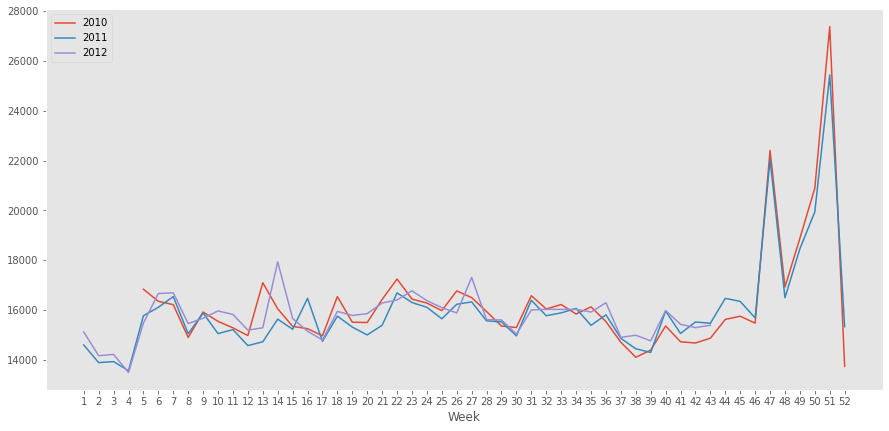

In [ ]:
weekly_sales = train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train.loc[train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train.loc[train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train.loc[train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(15, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

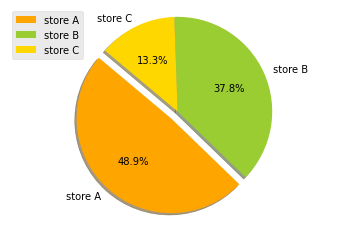

In [ ]:
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['Orange', 'yellowgreen', 'gold']
explode = (0.1, 0, 0)  
# explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

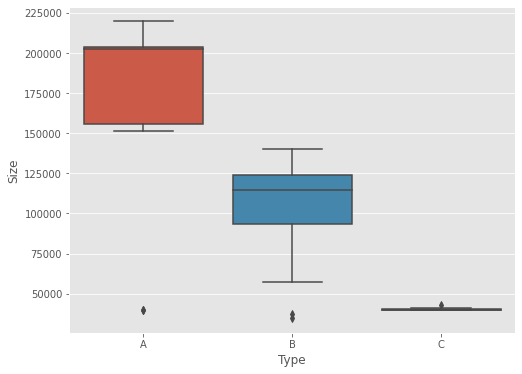

In [ ]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

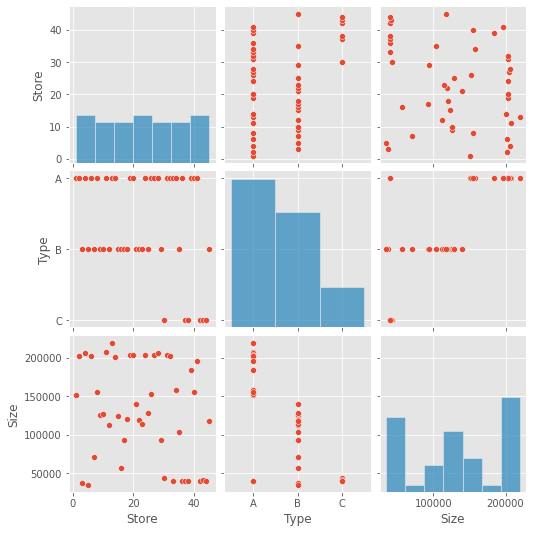

In [ ]:
sns.pairplot(stores, vars=['Store','Type','Size'])

Observations

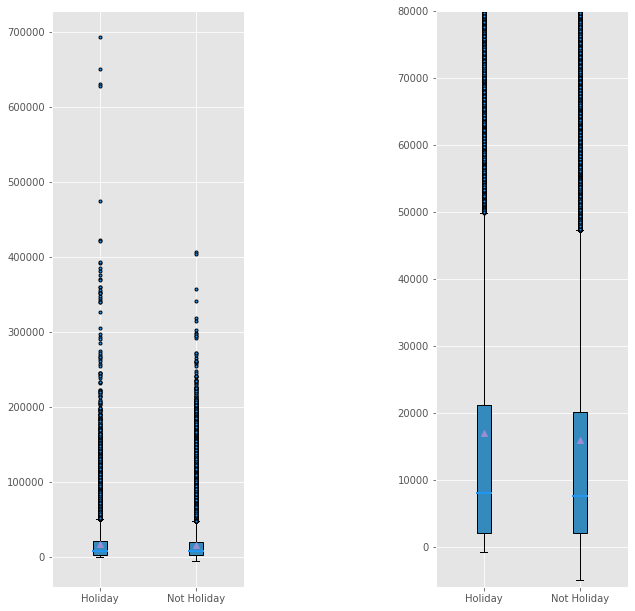

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (10,10))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'black',
          'markersize' : 3,
          'linestyle' : 'none',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()

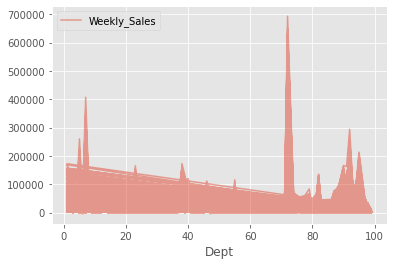

In [ ]:
train.plot(kind='line', x='Dept', y='Weekly_Sales',alpha=1.5, fig=(10,10))

In [ ]:
Y_train = train['Weekly_Sales']

In [ ]:
targets = Y_train.copy()

In [ ]:
train= train.drop(['Weekly_Sales'],axis=1)

In [ ]:
# Let's also identify the numeric and categorical columns.
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes('object').columns.tolist()

In [ ]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [ ]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Year                0
Month               0
Week                0
Day                 0
dtype: int64

Impute Numerical Data

In [ ]:
# Create the imputer
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')

In [ ]:
imputer.fit(train[numeric_cols])

SimpleImputer()

In [ ]:
#Replace all the null values
train[numeric_cols] =imputer.transform(train[numeric_cols])

In [ ]:
train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

Evaluate Algorithms

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train[numeric_cols])

MinMaxScaler()

In [ ]:
train[numeric_cols] = scaler.transform(train[numeric_cols])

In [ ]:
train[numeric_cols].describe().loc[['min', 'max']]

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# 'Date' is irrelevant and Drop it from data.
train= train.drop(['Date'],axis=1)
test = test.drop(['Date'], axis=1)

In [ ]:
# Preparing the dataset:
X_train =train[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
X_test = test[['Store', 'Dept','IsHoliday', 'Size', 'Week', 'Type', 'Year']]

In [ ]:
# Splitting and training
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# fitting the model
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
model.fit(train_inputs,train_targets)

[10:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending=False)

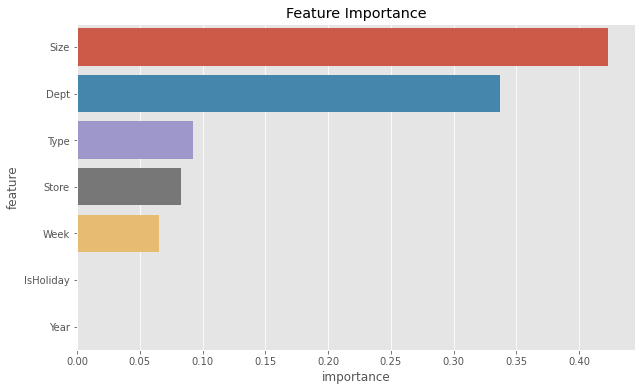

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
# Make and evaluate predictions:
x_pred = model.predict(train_inputs)
x_pred

array([ 4421.1025,  6982.323 ,  7777.918 , ..., 59104.188 , 14766.857 ,
       18813.03  ], dtype=float32)

In [ ]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(x_pred,train_targets)

14512.11770940201

In [ ]:
x_preds=model.predict(X_test)
x_preds

array([10529.779, 10529.779, 10529.779, ..., 10529.779, 10529.779,
       10529.779], dtype=float32)

In [ ]:
Final = X_test[['Store', 'Dept', 'Week']]
test['Weekly_Sales']= x_preds

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
test_params(n_estimators=20, max_depth=20)

(1797.811385410645, 3434.4162052825986)

In [ ]:
test_params(n_estimators=50, max_depth=10,min_samples_split=3, min_samples_leaf=4, max_features=0.4)

(13806.977338643439, 14212.377040662092)

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

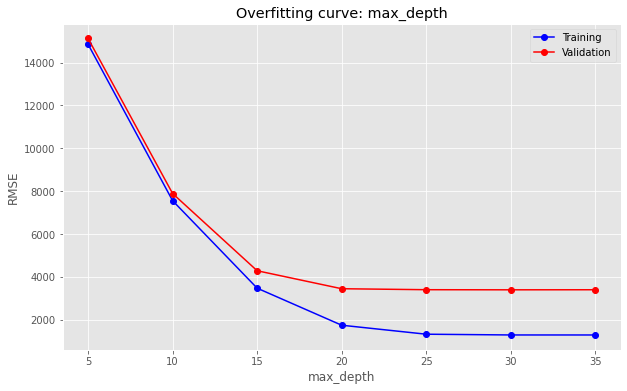

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

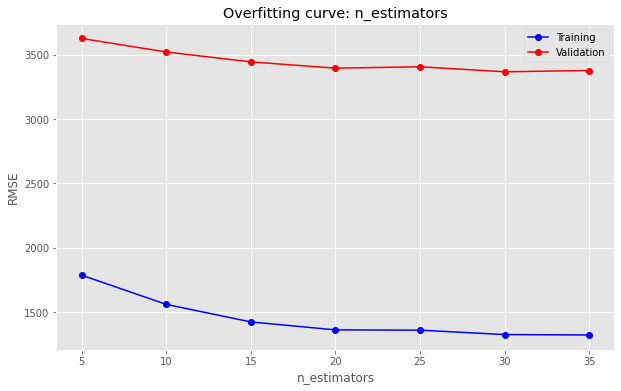

In [ ]:
test_param_and_plot('n_estimators', [5, 10, 15, 20, 25, 30, 35])

In [ ]:
# fitting the model with Hyperparameter Overfitting 
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=58)

In [ ]:
RF.score(train_inputs, train_targets)

0.9952445821172006

In [ ]:
RF.score(val_inputs, val_targets)

0.9773416804097966

In [ ]:
# Make and evaluate predictions:
train_preds = RF.predict(train_inputs)
train_preds

array([7.26057471e+00, 1.82209722e+03, 5.00164070e+02, ...,
       6.09752669e+04, 3.56102944e+04, 1.59191505e+04])

In [ ]:
rmse(train_targets,train_preds)

1562.9971407705332

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': RF.feature_importances_
}).sort_values('importance', ascending=False)

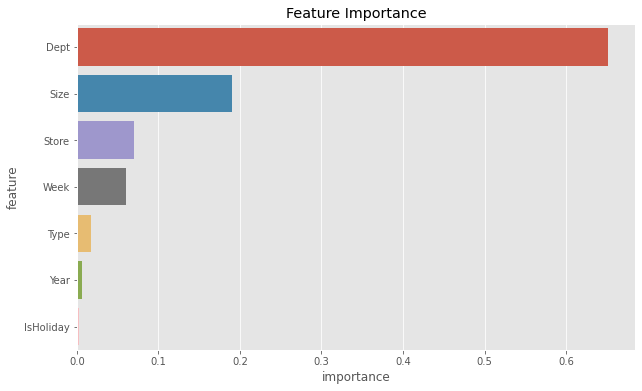

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
predict = RF.predict(X_test)
predict

array([1468.92301724, 1468.92301724, 1468.92301724, ..., 1468.92301724,
       1468.92301724, 1468.92301724])